In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Upload the Yahoo End Rank vs. Draft Sheet 
file_path = r"C:\Users\kenbo\OneDrive\Desktop\Fantasy Hockey Data Project\Draft Value.xlsx"

# read in the excel file
df = pd.read_excel(file_path)

df.head(10)

,Player Name,Rank,Pos Rank,Preseason,All Drafts,Change,Position,Change Bin
0,Connor McDavid,1.0,C1,1.2,1.1,0.1,C,Improved
1,Leon Draisaitl,2.0,LW1,2.5,2.4,0.4,LW,Improved
2,Auston Matthews,12.0,C5,3.1,3.1,-8.9,C,Relatively Similar
3,Nathan MacKinnon,7.0,C3,4.6,4.7,-2.3,C,Relatively Similar
4,Cale Makar,73.0,D13,5.5,5.4,-67.6,D,Disappointing
5,Kirill Kaprizov,47.0,LW16,6.8,6.8,-40.2,LW,Disappointing
6,Nikita Kucherov,6.0,RW2,8.9,8.6,2.6,RW,Improved
7,Mikko Rantanen,9.0,C4,8.7,8.8,-0.2,C,Relatively Similar
8,Andrei Vasilevskiy,43.0,G10,8.9,8.9,-34.1,G,Disappointing
9,Igor Shesterkin,36.0,G9,9,8.9,-27.1,G,Disappointing


In [20]:
# Convert 'All Drafts' column to numeric type, coercing non-numeric values to NaN
df['All Drafts'] = pd.to_numeric(df['All Drafts'], errors='coerce')

# Filter out non-numeric values and NaN values in 'All Drafts' column
df_filtered = df[pd.to_numeric(df['All Drafts'], errors='coerce').notnull()]

# Create a DataFrame to store rounds
rounds = pd.DataFrame(columns=['Round', 'Player', 'All Drafts', 'Position', 'Change Bin'])


# Iterate through each player
for _, player in df.iterrows():
    all_drafts = player['All Drafts']

    # Determine the round based on 'All Drafts' value
    if all_drafts <= 12:
        round_number = 1
    elif all_drafts <= 24:
        round_number = 2
    elif all_drafts <= 36:
        round_number = 3
    elif all_drafts <= 48:
        round_number = 4
    elif all_drafts <= 60:
        round_number = 5
    elif all_drafts <= 72:
        round_number = 6
    elif all_drafts <= 84:
        round_number = 7
    elif all_drafts <= 96:
        round_number = 8
    elif all_drafts <= 108:
        round_number = 9
    elif all_drafts <= 120:
        round_number = 10
    elif all_drafts <= 132:
        round_number = 11
    elif all_drafts <= 144:
        round_number = 12
    elif all_drafts <= 156:
        round_number = 13
    elif all_drafts <= 168:
        round_number = 14
    elif all_drafts <= 180:
        round_number = 15
    elif all_drafts <= 192:
        round_number = 16

    # Add the player to the respective round
    round_data = pd.DataFrame({'Round': round_number,
                               'Player': player,
                               'All Drafts': all_drafts,
                               'Position': player['Position'],
                               'Change Bin': player['Change Bin']}, index=[0])
    rounds = pd.concat([rounds, round_data], ignore_index=True)



In [21]:
# Calculate the percentage of each position labeled as 'Disappointing' for each round
position_disappointing_percentages = []
for round_number in range(1, 17):
    round_data = rounds[rounds['Round'] == round_number]  # Filter data for the current round

    round_position_counts = round_data['Position'].value_counts()  # Count the occurrences of each position
    round_disappointing_counts = round_data[round_data['Change Bin'] == 'Disappointing']['Position'].value_counts()  # Count the occurrences of each position labeled as 'Disappointing'

    percentages = round_disappointing_counts.div(round_position_counts) * 100  # Calculate the percentages
    percentages = percentages.reindex(['C', 'LW', 'RW', 'D', 'G'])  # Reorder the positions
    position_disappointing_percentages.append(percentages)

# Create a table to display the percentage of each position labeled as 'Disappointing' for each round
table_data = pd.concat(position_disappointing_percentages, axis=1, keys=['Round ' + str(round_number) for round_number in range(1, 17)])
table_data.index.name = 'Position'

# Replace NaNs with 0s
table_data = table_data.fillna(0)

# Display the table
print("Percentage of Disappointing Players by Position for Each Round:")
print(table_data)


Percentage of Disappointing Players by Position for Each Round:
          Round 1  Round 2     Round 3  Round 4  Round 5     Round 6   
Position                                                               
C             0.0     50.0   50.000000    100.0      0.0   50.000000  \
LW           50.0     40.0   66.666667     50.0      0.0    0.000000   
RW            0.0     50.0   50.000000     50.0     50.0   50.000000   
D           100.0    100.0  100.000000      0.0    100.0  100.000000   
G           100.0      0.0    0.000000     50.0    100.0   66.666667   

             Round 7    Round 8    Round 9   Round 10  Round 11   Round 12   
Position                                                                     
C         100.000000   0.000000   0.000000   0.000000       0.0  50.000000  \
LW          0.000000   0.000000   0.000000  33.333333       0.0   0.000000   
RW          0.000000  33.333333  33.333333   0.000000       0.0  33.333333   
D          33.333333   0.000000   0.00000

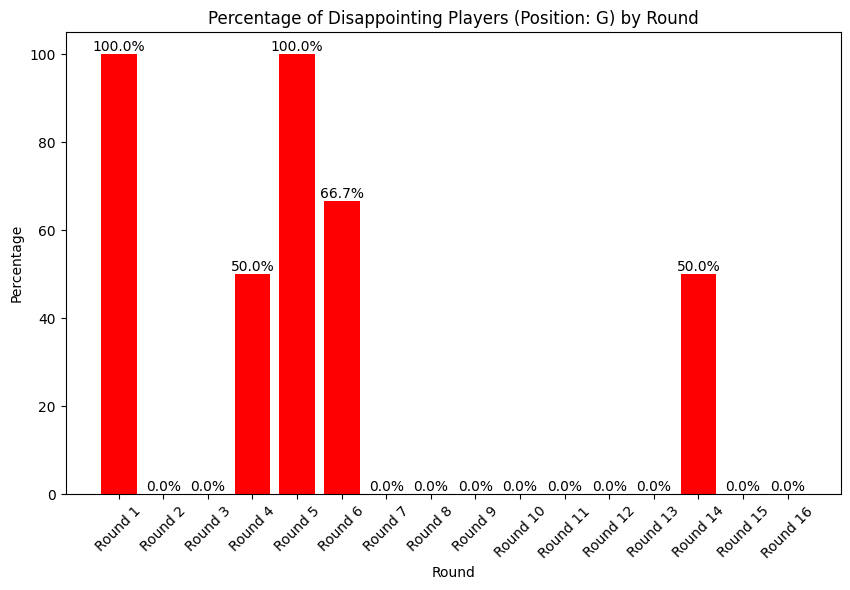

In [22]:
#Chart the results for Goalies 

# Select the data for the 'G' position
position_data = table_data.loc['G']

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar chart with labels and red color
bars = plt.bar(position_data.index, position_data.values, color='red')

# Add labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

plt.xlabel('Round')
plt.ylabel('Percentage')
plt.title('Percentage of Disappointing Players (Position: G) by Round')

# Tilt x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.show()


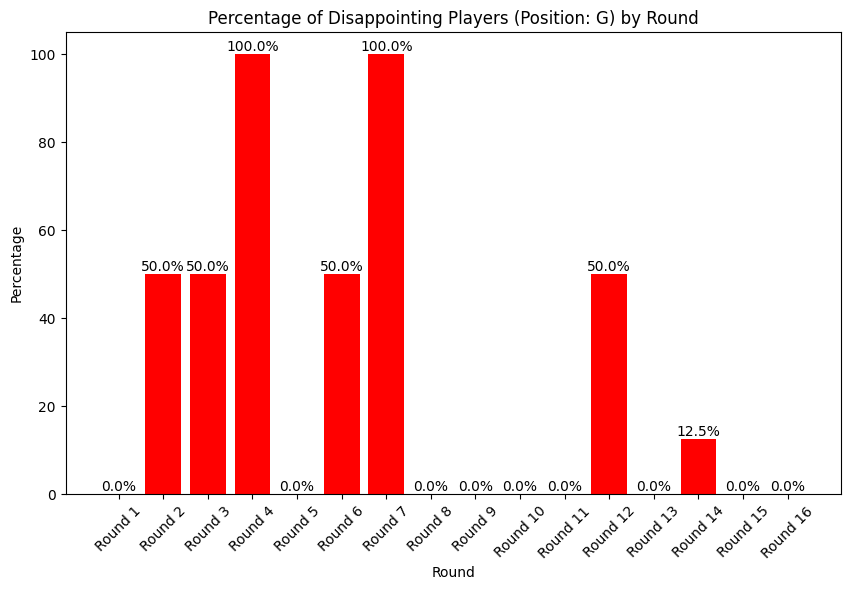

In [23]:
# Chart the results for Centers 

# Select the data for the 'C' position
position_data = table_data.loc['C']

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar chart with labels and red color
bars = plt.bar(position_data.index, position_data.values, color='red')

# Add labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

plt.xlabel('Round')
plt.ylabel('Percentage')
plt.title('Percentage of Disappointing Players (Position: C) by Round')

# Tilt x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.show()


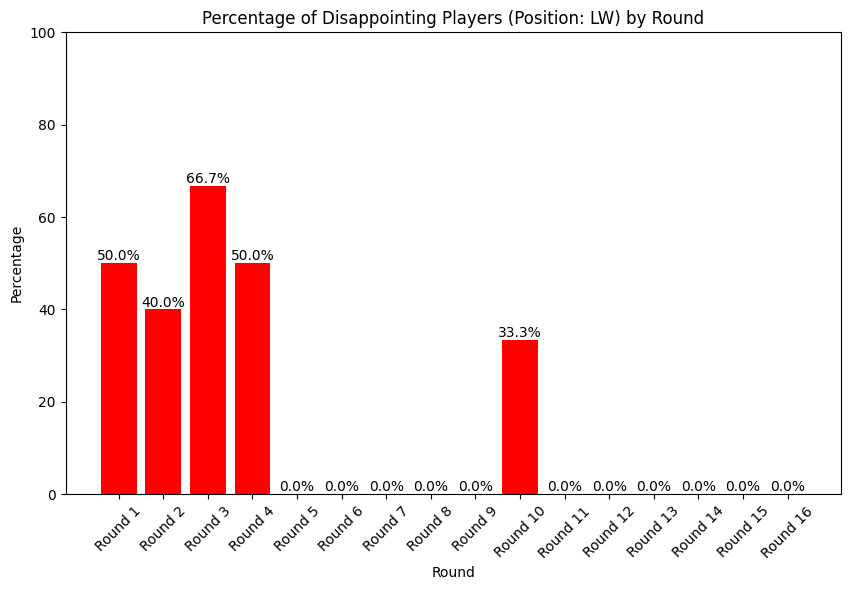

In [24]:
# Chart the results for LW

# Select the data for the 'LW' position
position_data = table_data.loc['LW']

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar chart with labels and red color
bars = plt.bar(position_data.index, position_data.values, color='red')

# Add labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

plt.xlabel('Round')
plt.ylabel('Percentage')
plt.title('Percentage of Disappointing Players (Position: LW) by Round')

# Tilt x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Set the y-axis limit to 100
plt.ylim(0, 100)

# Show the plot
plt.show()



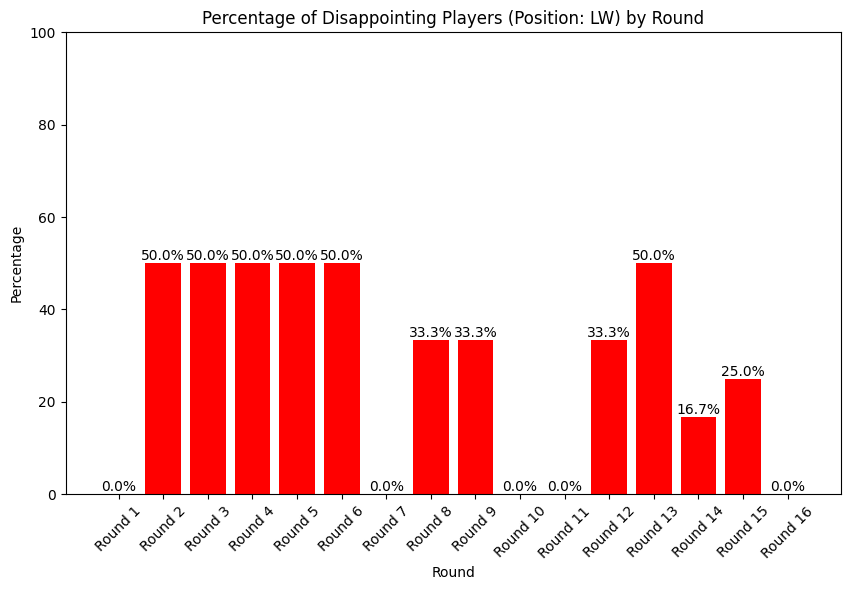

In [25]:
# Chart the results for RW 

# Select the data for the 'RW' position
position_data = table_data.loc['RW']

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar chart with labels and red color
bars = plt.bar(position_data.index, position_data.values, color='red')

# Add labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

plt.xlabel('Round')
plt.ylabel('Percentage')
plt.title('Percentage of Disappointing Players (Position: RW) by Round')

# Tilt x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Set the y-axis limit to 100
plt.ylim(0, 100)

# Show the plot
plt.show()


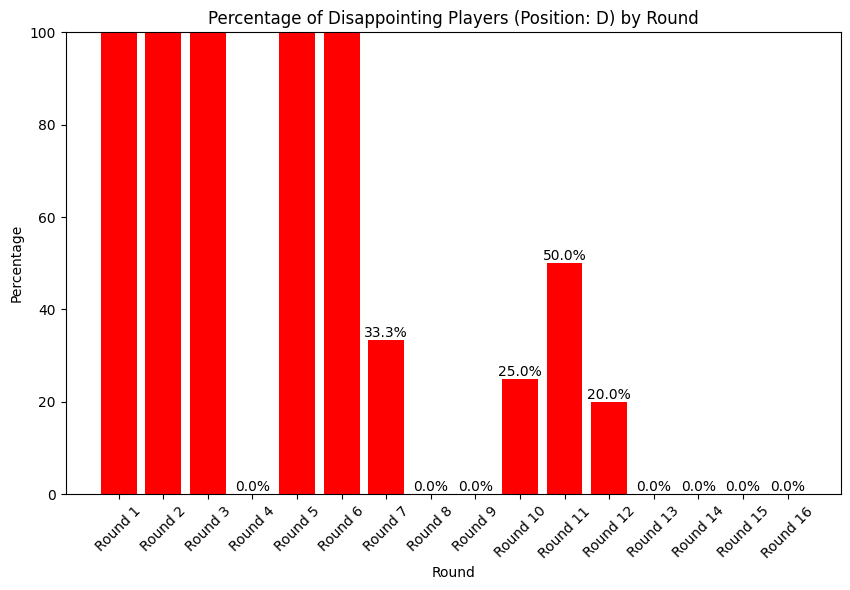

In [26]:
# Chart the results for D

# Select the data for the 'D' position
position_data = table_data.loc['D']

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar chart with labels and red color
bars = plt.bar(position_data.index, position_data.values, color='red')

# Add labels to the bars (excluding bars with 100%)
for bar in bars:
    height = bar.get_height()
    if height < 100:
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

plt.xlabel('Round')
plt.ylabel('Percentage')
plt.title('Percentage of Disappointing Players (Position: D) by Round')

# Tilt x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Set the y-axis limit to 100
plt.ylim(0, 100)

# Show the plot
plt.show()
